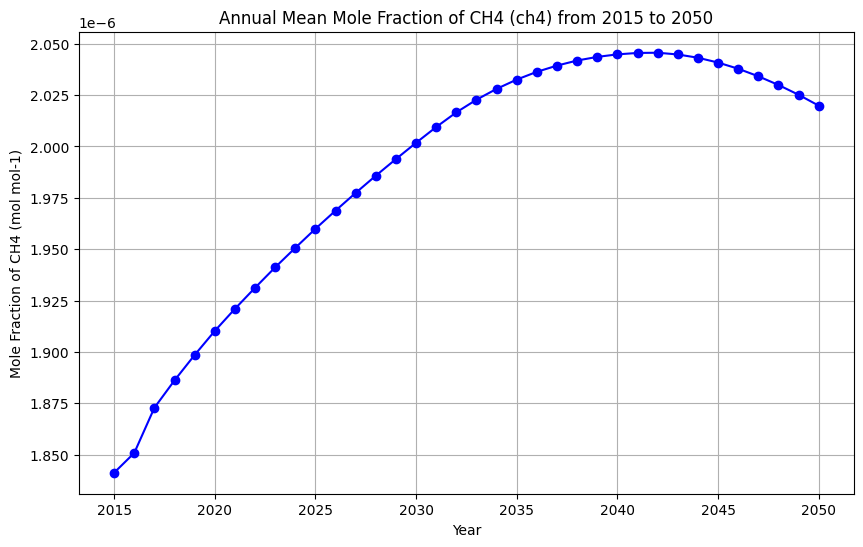

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset NetCDF
file_path = '/content/drive/My Drive/Colab Notebooks/ch4_Amon_CNRM-ESM2-1_ssp245_r1i1p1f2_gr_201501-210012.nc'
ds = xr.open_dataset(file_path)

# Seleziona il periodo dal 1990 al 2050
start_year = 2015
end_year = 2050
time_range = slice(f'{start_year}-01-01', f'{end_year}-12-31')

# Seleziona il livello di pressione di 100 Pa
plev_value = 1000000

# Seleziona il range di latitudini e longitudini
lat_range = slice(36.1286, 52.3731)

lon_range_1 = slice(350.8630, 360)
lon_range_2 = slice(0, 28.9759)

# Filtra il dataset per il periodo, il livello di pressione e le coordinate specificate
ch4_filtered_time = ds.ch4.sel(time=time_range)
ch4_filtered_plev = ch4_filtered_time.sel(plev=plev_value, method='nearest')
ch4_filtered_lat_lon_1 = ch4_filtered_plev.sel(lat=lat_range, lon=lon_range_1)
ch4_filtered_lat_lon_2 = ch4_filtered_plev.sel(lat=lat_range, lon=lon_range_2)

# Unisce i due filtri di longitudine
ch4_filtered = xr.concat([ch4_filtered_lat_lon_1, ch4_filtered_lat_lon_2], dim='lon')

# Calcola la media annua per ogni anno
ch4_annual_mean = ch4_filtered.groupby('time.year').mean(dim=['time', 'lat', 'lon'])

# Converti i risultati in un DataFrame Pandas per una visualizzazione più semplice
ch4_annual_mean_df = ch4_annual_mean.to_dataframe().reset_index()

# Salva il DataFrame in un file CSV
csv_file_path = 'ch4_annual_mean_2015_2050.csv'
ch4_annual_mean_df.to_csv(csv_file_path, index=False)

# Plotta le medie annue
plt.figure(figsize=(10, 6))
plt.plot(ch4_annual_mean_df['year'], ch4_annual_mean_df['ch4'], marker='o', linestyle='-', color='b')
plt.title('Annual Mean Mole Fraction of CH4 (ch4) from 2015 to 2050')
plt.xlabel('Year')
plt.ylabel('Mole Fraction of CH4 (mol mol-1)')
plt.grid(True)
plt.show()